In [1]:
#pipeline 
# put all together

# image =>convert to grayscale => crop_face(haar) => data preprocessing (normailze - resize)
#       => flatten our image (transform it to eigen faces using PCA) => Pass to a model(SVM)
#       => output 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import cv2 
import sklearn
import pickle
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# load all the models 
# haarcascade
# svm model
# pca_50
# mean_preprocess

haar = cv2.CascadeClassifier('./models/haarcascade_frontalface_default.xml')
mean = pickle.load(open('./models/mean_preprocessing.pickle', 'rb'))
svm_model = pickle.load(open('./models/best_model.pickle', 'rb'))
pca_model = pickle.load(open('./models/pca_30.pickle', 'rb'))

print('done')

done


In [4]:
gender_pred = ['Male', 'Female']
font = cv2.FONT_HERSHEY_DUPLEX
color = 'bgr'


# load test image 
test_path = './models/test_img2.jpg'
###### read image 
img = cv2.imread(test_path)

def pipeline(img,color='rgb'):
    ###### convert it to grayscale 
    if color == 'bgr':
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else :
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    ######## croping the image using Haar Classifier and drawing a rectangle on
    # applying haar 
    faces = haar.detectMultiScale(gray,1.5,3)
    for x,y,w,h in faces:
        # drawing a rectangle 
        cv2.rectangle(img,(x,y),(x+w,y+h), (255,0,0), 4)
        # crop the image 
        image = gray[y:y+h,x:x+w]

        #### normalization 
        image = image / 255.0
        #### resize 
        if image.shape[1] > 200:
            image_resize = cv2.resize(image, (200,200),cv2.INTER_AREA)  
        else :
            image_resize = cv2.resize(image, (200,200),cv2.INTER_CUBIC)

        #### flatten our image 
        image_reshape = image_resize.reshape(1,40000)
        #subtract with the mean 
        image_mean = image_reshape - mean
        # apply pca 
        eigen_image = pca_model.transform(image_mean)


        #### pass the eigen image to SVM model 
        results = svm_model.predict_proba(eigen_image)[0]  # cuz its an array 

        #### output 
        prediction = results.argmax() # pickig the highest probability
        score = results[prediction] # zero OR one 

        text = '%s : %0.2f'%(gender_pred[prediction],score)
        cv2.putText(img, text, (x,y), font,1, (255,0,0),2)  # position , fontScale and thickness
        
        return img
    
    
'''# show the image after 
cv2.imshow('image predition', img)
cv2.waitKey(0)
cv2.destroyAllWindows()'''

"# show the image after \ncv2.imshow('image predition', img)\ncv2.waitKey(0)\ncv2.destroyAllWindows()"

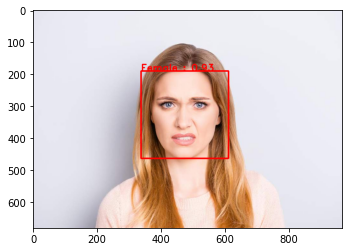

In [5]:
# for deployment HTML will block BGR format 

#read the image 
final = Image.open(test_path) #RGB
# convert it into array 
final = np.array(final)
# feed the image to the pipline 
final = pipeline(final)
# show image 
plt.imshow(final)
plt.show()

array(0.4870656)